# Data Exploration and Feature Engineering

## 1. Introduction
In this notebook, we will perform data exploration and feature engineering on our dataset. Our objectives are:

- **Data Cleaning**: Handle missing values and filter out irrelevant records.
- **Feature Engineering**: Compute additional features that could be useful for further analysis or modeling.
- **Data Preparation**: Ensure the dataset is clean, consistent, and ready for modeling.

---

## 2. Setup


### 2.1 Import Libraries

In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

# Import sklearn libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import QuantileRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, GridSearchCV
from xgboost import XGBRegressor, XGBClassifier
from scipy import stats

from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import roc_auc_score, make_scorer, accuracy_score, mean_squared_error




# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Configure matplotlib to display plots inline
%matplotlib inline

### 2.2 Load the Dataset


In [5]:
# Read the master.csv file
df_original = pd.read_csv('data/new/master_train.csv')

# Display the first few rows
df_original.head()


,answer_id,is_correct,created_at,user_id,grade_id,grade_name,school_id,school_name,user_level,question_id,...,difficulty,topic_id,topic_name,subject_id,subject_name,axis_id,axis_name,guide_id,template_id,student_answer
0,1360283,True,2022-05-01 20:54:38.343078,16464,1866.0,I°A 2022,91.0,Colegio Manuel José Irarrázaval,-2.198802,27281,...,-1.446116,625,Comprensión e interpretación del promedio,135,Medidas de tendencia central y posición,26,Probabilidad y estadísticas,377707,595,8
1,1597208,True,2023-08-06 22:54:49.689721,52991,2021.0,IV° Sección Única,227.0,San Miguel Arcángel,-0.352279,17311,...,-1.358058,452,Resolución de sistemas de ecuaciones,124,Sistemas de ecuaciones,24,Álgebra,417138,8571,\begin{Bmatrix}x + y = 1\\ x - y = 1\end{Bmatrix}
2,1468607,False,2022-09-29 12:15:16.720465,52167,NaN,NaN,NaN,NaN,0.674369,25537,...,-0.027555,553,Operatoria combinada de números enteros,181,Números Enteros,23,Números,397405,2960,`-69` celsius
3,1570364,False,2022-12-26 14:32:09.556197,51959,NaN,NaN,NaN,NaN,-2.754623,20710,...,-2.666517,448,Lenguaje Algebraico,122,Expresiones algebraicas,24,Álgebra,413423,7361,skipped
4,1333175,True,2022-03-31 02:29:40.801884,16395,1870.0,III°A 2022,91.0,Colegio Manuel José Irarrázaval,1.436341,26175,...,-1.062105,580,Propiedad: Multiplicación y división de una po...,116,Potencias,23,Números,373644,202,`3^3`


---

## 3. Data Summary


### 3.1 Basic Information


In [6]:
# Display basic information about the dataset
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224783 entries, 0 to 224782
Data columns (total 25 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   answer_id       224783 non-null  int64  
 1   is_correct      224783 non-null  bool   
 2   created_at      224783 non-null  object 
 3   user_id         224783 non-null  int64  
 4   grade_id        188497 non-null  float64
 5   grade_name      188497 non-null  object 
 6   school_id       188497 non-null  float64
 7   school_name     188497 non-null  object 
 8   user_level      217485 non-null  float64
 9   question_id     224783 non-null  int64  
 10  options         224783 non-null  object 
 11  question_title  224783 non-null  object 
 12  correct_option  224783 non-null  object 
 13  solution        224782 non-null  object 
 14  hint            224715 non-null  object 
 15  difficulty      224783 non-null  float64
 16  topic_id        224783 non-null  int64  
 17  topic_name

### 3.2 Statistical Summary


In [7]:
# Display statistical summary of numerical columns
df_original.describe()

,answer_id,user_id,grade_id,school_id,user_level,question_id,difficulty,topic_id,subject_id,axis_id,guide_id,template_id
count,2.247830e+05,224783.000000,188497.000000,188497.000000,217485.000000,224783.000000,224783.000000,224783.000000,224783.000000,224783.000000,224783.000000,224783.000000
mean,1.462590e+06,38122.430962,1889.877659,97.205961,-0.500609,22610.106085,-1.264309,525.455902,144.622049,23.763866,394247.935129,3293.806373
std,8.129701e+04,15933.512787,98.545724,64.442915,1.601238,4076.448471,1.192307,68.696241,32.676853,0.954745,14226.578980,2735.594285
min,1.321318e+06,2173.000000,777.000000,1.000000,-3.000000,15654.000000,-11.000000,409.000000,113.000000,23.000000,371014.000000,2.000000
25%,1.392264e+06,22092.000000,1863.000000,57.000000,-1.763624,18863.000000,-2.057821,462.000000,116.000000,23.000000,381118.000000,823.000000
50%,1.462585e+06,50116.000000,1868.000000,91.000000,-0.600652,23408.000000,-1.387895,540.000000,127.000000,23.000000,394084.000000,2298.000000
75%,1.532820e+06,51959.000000,1930.000000,105.000000,0.571905,26187.000000,-0.899607,572.000000,181.000000,24.000000,407306.000000,5750.000000
max,1.603613e+06,53189.000000,2029.000000,238.000000,3.000000,29256.000000,3.000000,667.000000,199.000000,26.000000,419681.000000,9350.000000


### 3.3 Missing Values

In [8]:
# Check for missing values in each column
df_original.isnull().sum()

answer_id             0
is_correct            0
created_at            0
user_id               0
grade_id          36286
grade_name        36286
school_id         36286
school_name       36286
user_level         7298
question_id           0
options               0
question_title        0
correct_option        0
solution              1
hint                 68
difficulty            0
topic_id              0
topic_name            0
subject_id            0
subject_name          0
axis_id               0
axis_name             0
guide_id              0
template_id           0
student_answer        0
dtype: int64

### 3.4 Initial Observations
- **Missing Values**: There are missing values in the `grade` and `school` columns, which are not critical for our analysis.
- **User Level**: The `user_level` column has some missing values, which we need to address.
- **Timestamp Format**: The `created_at` column is in string format and should be converted to datetime.
- **User Level Distribution**: The `user_level` parameter might have concentrations at -3 and 3 due to hard limits.


---

## 4. Data Cleaning

### 4.1 Remove Rows with Missing `user_level`

We will remove rows where `user_level` is missing, as it is essential for our analysis.


In [9]:
# Drop rows with missing 'user_level'
df_original.dropna(subset=['user_level'], inplace=True)

# Confirm that there are no missing 'user_level' values
df_original['user_level'].isnull().sum()

0

### 4.2 Convert `created_at` to Datetime

In [10]:
# Convert 'created_at' to datetime format
df_original['created_at'] = pd.to_datetime(df_original['created_at'])

# Confirm the conversion
df_original['created_at'].dtype

dtype('<M8[ns]')

### 4.3 Filter Users with Sufficient Activity
We will keep only users who have answered at least 20 questions, as the `user_level` parameter is not reliable for users with fewer interactions.

In [11]:
# Count the number of answers per user
answer_counts = df_original['user_id'].value_counts()

# Identify users with at least 20 answers
active_users = answer_counts[answer_counts >= 20].index

# Filter the DataFrame to include only active users
df_active = df_original[df_original['user_id'].isin(active_users)].copy()

# Print statistics
print(f"Original number of answers: {len(df_original)}")
print(f"Number of answers after filtering: {len(df_active)}")
print(f"Original number of students: {df_original['user_id'].nunique()}")
print(f"Number of students after filtering: {df_active['user_id'].nunique()}")

Original number of answers: 217485
Number of answers after filtering: 212865
Original number of students: 1867
Number of students after filtering: 1417


### 4.4 Filter questions with difficulty outside the range of -3 to 3
The way the psychometric parameters are calculated, it is not possible for the difficulty to be outside the range of -3 to 3. We will filter out these questions.

In [12]:
# Filter questions with difficulty outside the range of -3 to 3
df_active = df_active[df_active['difficulty'].between(-3, 3)]

# Print statistics
print(f"Number of answers after filtering: {len(df_active)}")

Number of answers after filtering: 212825


---

## 5. Feature Engineering

### 5.1 Calculating Time Taken per Answer
We will compute the time taken to answer each question by calculating the difference between the `created_at` timestamps of consecutive answers within the same `template_id` for each user. The first answer in each template will have a NaN `student_time_taken` value since there is no prior answer to compare.

In [13]:
# Sort the DataFrame to establish chronological order within each user and template
df_active.sort_values(['user_id', 'template_id', 'created_at'], inplace=True)

# Calculate time differences within each user's template
df_active['student_time_taken'] = df_active.groupby(['user_id', 'template_id'])['created_at'].diff().dt.total_seconds()

# Display time statistics
print("\nTime statistics (in seconds):")
print(df_active['student_time_taken'].describe())


Time statistics (in seconds):
count    1.919380e+05
mean     1.179235e+04
std      2.548449e+05
min      5.274000e-03
25%      1.309866e+01
50%      3.220577e+01
75%      8.224386e+01
max      1.986852e+07
Name: student_time_taken, dtype: float64


### 5.2 Removing Outliers in Time Taken
We will remove answers where the `student_time_taken` is less than 3 seconds or more than 600 seconds (10 minutes), as these are likely to be outliers due to very quick guesses or prolonged inactivity.

In [14]:
# Filter out outliers based on 'student_time_taken'
# Remove NaN values for filtering (first answer in each group)
df_time_filtered = df_active[df_active['student_time_taken'].notna()].copy()

# Define time thresholds
time_lower_bound = 3    # seconds
time_upper_bound = 600  # seconds

# Apply time thresholds
df_time_filtered = df_time_filtered[
    (df_time_filtered['student_time_taken'] >= time_lower_bound) &
    (df_time_filtered['student_time_taken'] <= time_upper_bound)
]

# Combine with rows where 'student_time_taken' is NaN (first answers)
df_time_filtered = pd.concat([
    df_time_filtered,
    df_active[df_active['student_time_taken'].isna()]
])

# Sort the final DataFrame
df_time_filtered.sort_values(['user_id', 'template_id', 'created_at'], inplace=True)

# Reset index
df_time_filtered.reset_index(drop=True, inplace=True)

# Print statistics
print(f"\nOriginal number of answers: {len(df_active)}")
print(f"Number of answers after time filtering: {len(df_time_filtered)}")
print(f"Answers removed: {len(df_active) - len(df_time_filtered)}")

# Calculate percentage of quick and slow answers
total_timed_answers = df_active['student_time_taken'].notna().sum()
too_quick = (df_active['student_time_taken'] < time_lower_bound).sum()
too_slow = (df_active['student_time_taken'] > time_upper_bound).sum()

print(f"\nPercentage of filtered answers:")
print(f"Too quick (<{time_lower_bound}s): {(too_quick / total_timed_answers) * 100:.2f}%")
print(f"Too slow (>{time_upper_bound}s): {(too_slow / total_timed_answers) * 100:.2f}%")


Original number of answers: 212825
Number of answers after time filtering: 198760
Answers removed: 14065

Percentage of filtered answers:
Too quick (<3s): 4.60%
Too slow (>600s): 2.72%


### 5.3 Distribution of Time Taken

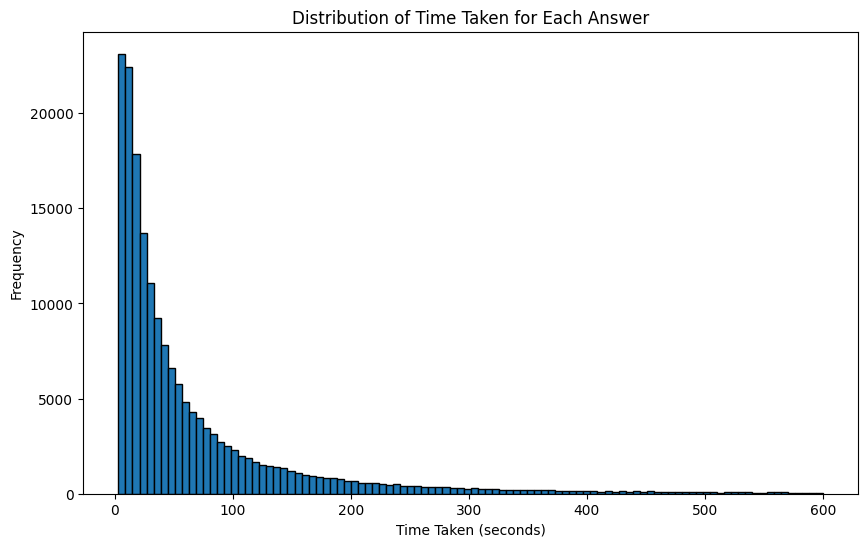

In [15]:
# Plot the distribution of 'student_time_taken'
plt.figure(figsize=(10,6))
plt.hist(df_time_filtered['student_time_taken'].dropna(), bins=100, edgecolor='black')
plt.title('Distribution of Time Taken for Each Answer')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Frequency')
plt.show()


### 5.4 Calculating Cumulative Statistics
We will compute cumulative counts of attempts and correct answers for each student at different levels (topic, subject, axis, and total) up to each point in time. This will help in understanding the student's progress over time.

### 5.4.1 Cumulative Attempts and Correct Answers per Student

In [16]:
# Ensure data is sorted by 'user_id' and 'created_at'
df_time_filtered.sort_values(['user_id', 'created_at'], inplace=True)

# Compute cumulative total attempts and correct answers per student
df_time_filtered['student_total_attempts'] = df_time_filtered.groupby('user_id').cumcount() + 1
df_time_filtered['student_total_correct'] = df_time_filtered.groupby('user_id')['is_correct'].cumsum()

# Compute cumulative attempts and correct answers per student per topic
df_time_filtered['student_topic_attempts'] = df_time_filtered.groupby(['user_id', 'topic_id']).cumcount() + 1
df_time_filtered['student_topic_correct'] = df_time_filtered.groupby(['user_id', 'topic_id'])['is_correct'].cumsum()

# Compute cumulative attempts and correct answers per student per subject
df_time_filtered['student_subject_attempts'] = df_time_filtered.groupby(['user_id', 'subject_id']).cumcount() + 1
df_time_filtered['student_subject_correct'] = df_time_filtered.groupby(['user_id', 'subject_id'])['is_correct'].cumsum()

# Compute cumulative attempts and correct answers per student per axis
df_time_filtered['student_axis_attempts'] = df_time_filtered.groupby(['user_id', 'axis_id']).cumcount() + 1
df_time_filtered['student_axis_correct'] = df_time_filtered.groupby(['user_id', 'axis_id'])['is_correct'].cumsum()

### 5.4.2 Cumulative Attempts and Success Rate per Question
We want to know how many students have attempted each question and how many have gotten it correct at each point in time.


In [17]:
# Compute cumulative attempts and correct answers per question
df_time_filtered['question_attempts_count'] = df_time_filtered.groupby('question_id').cumcount() + 1
df_time_filtered['question_success_count'] = df_time_filtered.groupby('question_id')['is_correct'].cumsum()

# Compute success ratio per question
df_time_filtered['question_success_ratio'] = df_time_filtered['question_success_count'] / df_time_filtered['question_attempts_count']

# Display summary statistics
print("\nSummary of question attempt statistics:")
summary_stats = df_time_filtered[['question_attempts_count', 'question_success_count', 'question_success_ratio']].describe()
print(summary_stats)



Summary of question attempt statistics:
       question_attempts_count  question_success_count  question_success_ratio
count            198760.000000           198760.000000           198760.000000
mean                 34.526223               24.756983                0.695876
std                  36.703492               28.588251                0.239871
min                   1.000000                0.000000                0.000000
25%                   8.000000                5.000000                0.551282
50%                  22.000000               15.000000                0.739130
75%                  47.000000               33.000000                0.882353
max                 274.000000              225.000000                1.000000


### 5.5 Calculating Average Time per Question
We will compute the average time a student takes to answer each question up to each point in time.


In [18]:
# Replace NaN in 'student_time_taken' with zeros for cumulative calculations
df_time_filtered['student_time_taken_filled'] = df_time_filtered['student_time_taken'].fillna(0)

# Compute cumulative sum of 'student_time_taken' per question
df_time_filtered['cumulative_time_sum'] = df_time_filtered.groupby('question_id')['student_time_taken_filled'].cumsum()

# Compute cumulative count of non-NaN 'student_time_taken' per question
df_time_filtered['cumulative_time_count'] = df_time_filtered.groupby('question_id')['student_time_taken'].cumcount() + 1

# Compute cumulative average time per question
df_time_filtered['avg_question_time'] = df_time_filtered['cumulative_time_sum'] / df_time_filtered['cumulative_time_count']

# Drop temporary columns
df_time_filtered.drop(columns=['student_time_taken_filled', 'cumulative_time_sum', 'cumulative_time_count'], inplace=True)

# Display summary statistics
print("\nSummary of average time statistics:")
summary_stats = df_time_filtered['avg_question_time'].describe()
print(summary_stats)


Summary of average time statistics:
count    198760.000000
mean         57.338297
std          43.087178
min           0.000000
25%          31.223625
50%          49.235632
75%          72.387736
max         596.291865
Name: avg_question_time, dtype: float64


### 5.6 Save the Processed Data

In [19]:
# Save the updated DataFrame to a CSV file
df_time_filtered.to_csv('data/new/master_with_all_stats.csv', index=False)
print("Updated dataset saved to 'data/new/master_with_all_stats.csv'")

Updated dataset saved to 'data/new/master_with_all_stats.csv'


---

## 6. Data Verification
As a sanity check, let's examine the cumulative stats and time taken for a random template.


In [22]:
# Choose a random template_id from the unique template_ids in the dataframe
random_template_id = random.choice(df_time_filtered['template_id'].unique())

# Filter the dataframe for this random template_id
template_df = df_time_filtered[df_time_filtered['template_id'] == random_template_id]

# Sort by 'created_at' to observe the progression clearly
template_df = template_df.sort_values(by='created_at').reset_index(drop=True)

# Display relevant columns to observe changes in cumulative stats
columns_to_display = [
    'template_id', 'answer_id', 'user_id', 'question_id', 'is_correct', 'topic_id', 'subject_id', 'axis_id',
    'student_topic_attempts', 'student_topic_correct', 
    'student_subject_attempts', 'student_subject_correct',
    'student_axis_attempts', 'student_axis_correct',
    'student_total_attempts', 'student_total_correct',
    'question_attempts_count', 'question_success_count', 'question_success_ratio',
    'created_at', 'student_time_taken', 'avg_question_time'
]

# Show the subset of data for inspection
template_df[columns_to_display].head(10)


,template_id,answer_id,user_id,question_id,is_correct,topic_id,subject_id,axis_id,student_topic_attempts,student_topic_correct,...,student_axis_attempts,student_axis_correct,student_total_attempts,student_total_correct,question_attempts_count,question_success_count,question_success_ratio,created_at,student_time_taken,avg_question_time
0,2284,1454377,50420,28287,False,432,119,24,1,0,...,23,13,160,99,133,90,0.676692,2022-09-05 21:31:29.885146,NaN,35.975225
1,2284,1454380,50420,16694,False,432,119,24,2,0,...,24,13,161,99,158,57,0.360759,2022-09-05 21:32:00.246121,30.360975,80.054960
2,2284,1454385,50420,28278,True,432,119,24,3,1,...,25,14,162,100,145,126,0.868966,2022-09-05 21:32:39.768704,39.522583,36.138019
3,2284,1454386,50420,28280,True,432,119,24,4,2,...,26,15,163,101,88,65,0.738636,2022-09-05 21:34:37.530383,117.761679,69.190777
4,2284,1454387,50420,25582,True,432,119,24,5,3,...,27,16,164,102,169,144,0.852071,2022-09-05 21:35:10.085307,32.554924,40.321404
5,2284,1454388,50420,28286,True,432,119,24,6,4,...,28,17,165,103,82,51,0.621951,2022-09-05 21:36:22.824210,72.738903,62.789209
6,2284,1454389,50420,28279,True,432,119,24,7,5,...,29,18,166,104,108,85,0.787037,2022-09-05 21:36:44.537739,21.713529,23.760511
7,2284,1454391,50420,28285,False,432,119,24,8,5,...,30,18,167,104,93,52,0.559140,2022-09-05 21:40:25.685634,221.147895,48.311112
8,2284,1454401,50368,28287,True,432,119,24,1,1,...,15,9,190,162,94,61,0.648936,2022-09-05 22:09:12.196976,NaN,50.799070
9,2284,1454404,50368,16694,True,432,119,24,2,2,...,16,10,191,163,122,42,0.344262,2022-09-05 22:11:04.671536,112.474560,82.423497


---

## 7. Data Exploration
In this section, we will explore the variables in our dataset to understand their distributions, relationships, and potential insights they might offer.

### 7.1 Overview of the Dataset
First, let's look at the overall structure and content of the dataset.


#### 7.1.1 Load the Dataset

In [23]:
# Check if df_time_filtered exists and load it if not
if 'df_time_filtered' in locals() or 'df_time_filtered' in globals():
    df = df_time_filtered.copy()
else:
    df = pd.read_csv('data/new/master_with_all_stats.csv')
    

#### 7.1.2 Display First Few Rows

In [24]:
# Display the first few rows of the DataFrame
df.head()

,answer_id,is_correct,created_at,user_id,grade_id,grade_name,school_id,school_name,user_level,question_id,...,student_topic_attempts,student_topic_correct,student_subject_attempts,student_subject_correct,student_axis_attempts,student_axis_correct,question_attempts_count,question_success_count,question_success_ratio,avg_question_time
0,1494041,True,2022-10-20 02:28:52.516332,2315,909.0,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24857,...,1,1,1,1,1,1,1,1,1.0,0.000000
1,1494042,True,2022-10-20 02:29:27.909258,2315,909.0,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24889,...,2,2,2,2,2,2,1,1,1.0,35.392926
2,1494043,True,2022-10-20 02:29:41.707754,2315,909.0,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24906,...,3,3,3,3,3,3,1,1,1.0,13.798496
3,1494044,True,2022-10-20 02:29:54.616890,2315,909.0,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,25257,...,4,4,4,4,4,4,1,1,1.0,12.909136
4,1494045,True,2022-10-20 02:30:21.414016,2315,909.0,IVºB,228.0,Colegio Profe Cursos Antiguos,0.416574,24885,...,5,5,5,5,5,5,1,1,1.0,26.797126


#### 7.1.3 DataFrame Information

In [25]:
# Get information about data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 198760 entries, 0 to 198759
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   answer_id                 198760 non-null  int64         
 1   is_correct                198760 non-null  bool          
 2   created_at                198760 non-null  datetime64[ns]
 3   user_id                   198760 non-null  int64         
 4   grade_id                  169260 non-null  float64       
 5   grade_name                169260 non-null  object        
 6   school_id                 169260 non-null  float64       
 7   school_name               169260 non-null  object        
 8   user_level                198760 non-null  float64       
 9   question_id               198760 non-null  int64         
 10  options                   198760 non-null  object        
 11  question_title            198760 non-null  object        
 12  correct

#### 7.1.4 Statistical Summary

In [26]:
# Display statistical summary of numerical columns
df.describe()

,answer_id,created_at,user_id,grade_id,school_id,user_level,question_id,difficulty,topic_id,subject_id,...,student_topic_attempts,student_topic_correct,student_subject_attempts,student_subject_correct,student_axis_attempts,student_axis_correct,question_attempts_count,question_success_count,question_success_ratio,avg_question_time
count,1.987600e+05,198760,198760.000000,169260.000000,169260.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,...,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000,198760.000000
mean,1.462231e+06,2022-09-14 12:11:41.463200256,38016.681656,1891.125482,97.853509,-0.431650,22644.995437,-1.289981,525.417941,144.992589,...,7.506214,5.411733,20.159645,15.027098,61.232471,46.410163,34.526223,24.756983,0.695876,57.338297
min,1.321329e+06,2022-03-07 13:48:20.372871,2315.000000,777.000000,1.000000,-3.000000,15654.000000,-3.000000,409.000000,113.000000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.392776e+06,2022-05-31 15:32:56.795766528,22068.000000,1863.000000,57.000000,-1.678385,19210.000000,-2.067899,462.000000,116.000000,...,2.000000,1.000000,5.000000,3.000000,15.000000,10.000000,8.000000,5.000000,0.551282,31.223625
50%,1.462882e+06,2022-09-21 00:02:53.883807488,50104.000000,1868.000000,91.000000,-0.530528,23438.000000,-1.409124,540.000000,128.000000,...,5.000000,3.000000,12.000000,8.000000,38.000000,27.000000,22.000000,15.000000,0.739130,49.235632
75%,1.530863e+06,2022-11-14 13:15:59.433190144,51959.000000,1934.000000,105.000000,0.633619,26195.000000,-0.924952,572.000000,181.000000,...,9.000000,7.000000,26.000000,19.000000,80.000000,60.000000,47.000000,33.000000,0.882353,72.387736
max,1.603613e+06,2024-03-25 19:15:40.653993,53189.000000,2029.000000,238.000000,3.000000,29256.000000,2.994811,667.000000,199.000000,...,301.000000,203.000000,313.000000,221.000000,817.000000,768.000000,274.000000,225.000000,1.000000,596.291865
std,8.078251e+04,NaN,15961.115863,93.354941,64.508780,1.594491,4078.454893,1.164354,68.343805,32.864047,...,11.098172,8.063905,25.049182,19.615601,74.088786,60.708967,36.703492,28.588251,0.239871,43.087178


---

### 7.2 Univariate Analysis
We will analyze individual variables to understand their distributions and identify any anomalies.

#### 7.2.1 Distribution of `student_time_taken`

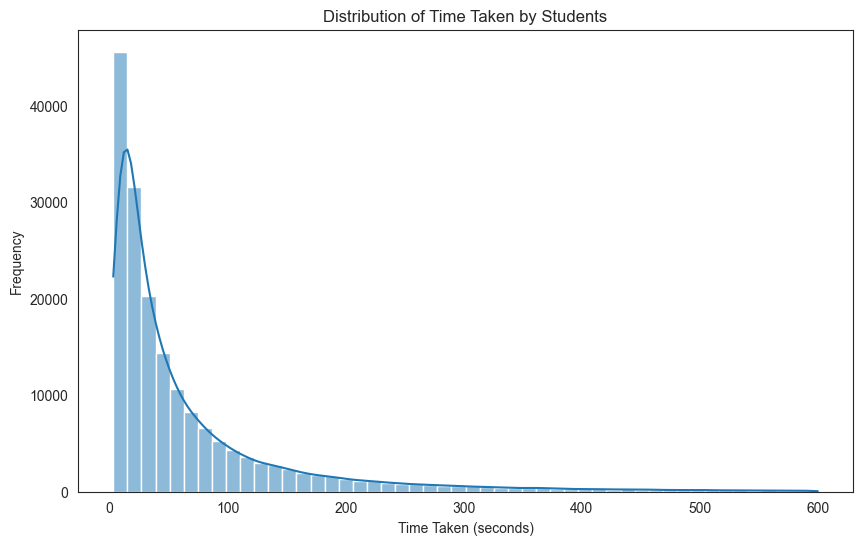

In [27]:
# Plot the distribution of 'student_time_taken'
plt.figure(figsize=(10,6))
sns.histplot(x=df['student_time_taken'].dropna(), bins=50, kde=True)
plt.title('Distribution of Time Taken by Students')
plt.xlabel('Time Taken (seconds)')
plt.ylabel('Frequency')
plt.show()

Observations:
- Most students take between 3 to 20 seconds to answer a question.
- There is a long tail indicating some students take longer times.


#### 7.2.2 Distribution of `is_correct`

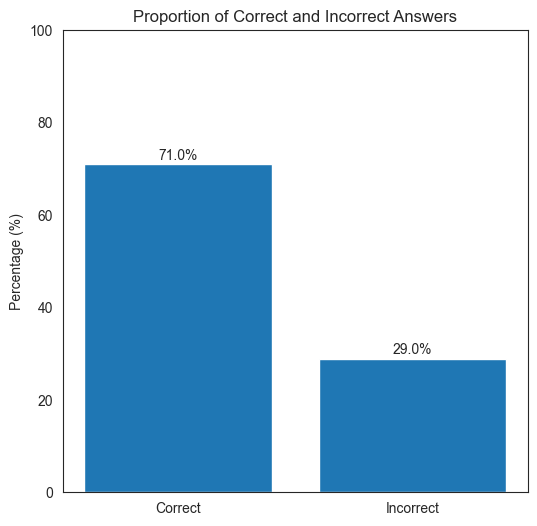

In [28]:
# Calculate the proportion of correct and incorrect answers
correct_counts = df['is_correct'].value_counts(normalize=True) * 100

# Plot the distribution
plt.figure(figsize=(6,6))
plt.bar(['Correct', 'Incorrect'], correct_counts)
plt.title('Proportion of Correct and Incorrect Answers')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)  # Set y-axis limit to 100% for better visualization
# Add percentage labels on top of bars
for i, v in enumerate(correct_counts):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')
plt.show()

Observations:
- The questions seem to be easy, with approximately 70% correct and 30% incorrect answers.


#### 7.2.3 Distribution of `user_level`

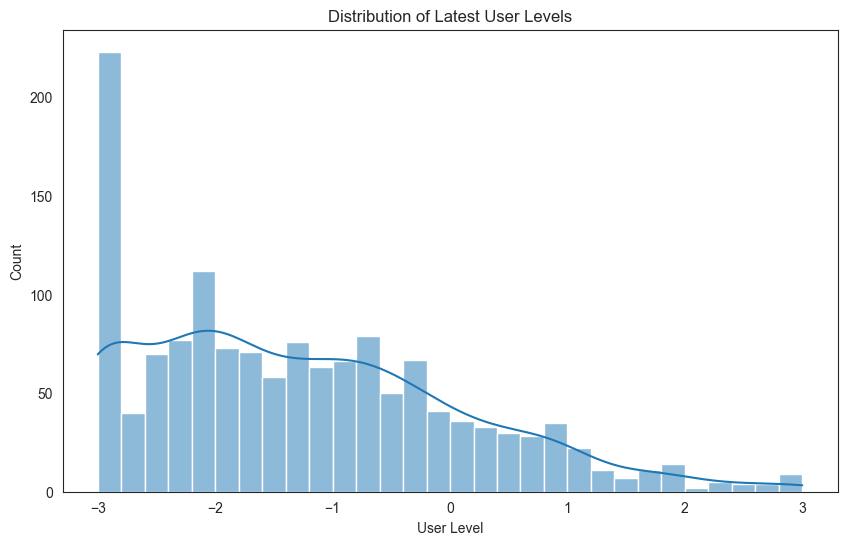


Summary Statistics of Latest User Levels:
count    1417.000000
mean       -1.274844
std         1.356525
min        -3.000000
25%        -2.331786
50%        -1.466831
75%        -0.387084
max         3.000000
Name: user_level, dtype: float64


In [29]:
# Get the last user_level for each user by sorting by created_at and taking the last entry
latest_user_levels = df.sort_values('created_at').groupby('user_id')['user_level'].last()

plt.figure(figsize=(10,6))
sns.histplot(x=latest_user_levels, bins=30, kde=True)
plt.title('Distribution of Latest User Levels')
plt.xlabel('User Level')
plt.ylabel('Count')
plt.show()

# Print some summary statistics
print("\nSummary Statistics of Latest User Levels:")
print(latest_user_levels.describe())


Observations:
- The distribution of user levels follows a roughly normal distribution centered around -1.5
- There appears to be a notable spike or high concentration of users with skill level -3, which represents the lowest skill level
- This suggests that while most users have moderate skill levels, there is a significant group of beginners or struggling users



#### 7.2.4 Distribution of `avg_question_time`

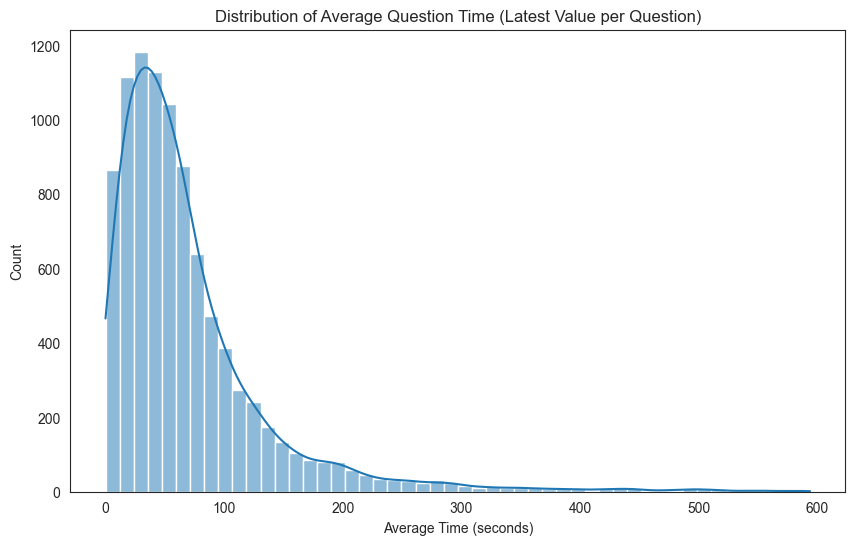

In [30]:
# Get the latest avg_question_time for each unique question
latest_avg_time = df.sort_values('created_at').groupby('question_id')['avg_question_time'].last()

plt.figure(figsize=(10,6))
sns.histplot(x=latest_avg_time.dropna(), bins=50, kde=True)
plt.title('Distribution of Average Question Time (Latest Value per Question)')
plt.xlabel('Average Time (seconds)')
plt.ylabel('Count')
plt.show()


Observations:
- The distribution of average question time appears to follow a normal distribution centered around 50 seconds, but is truncated at 0 since negative times are impossible
- There is a notable long right tail in the distribution, indicating that for some questions students take significantly longer - over 300 seconds and in some cases even 500-600 seconds to answer


#### 7.2.5 Distribution of `question_success_ratio`


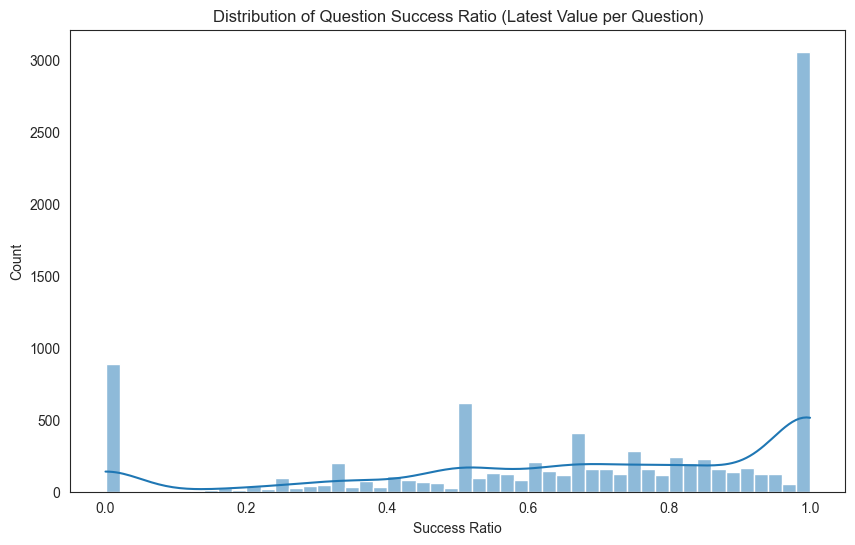

In [31]:
# Get the latest success ratio for each unique question
latest_success_ratio = df.sort_values('created_at').groupby('question_id')['question_success_ratio'].last()

plt.figure(figsize=(10,6))
sns.histplot(x=latest_success_ratio.dropna(), bins=50, kde=True)
plt.title('Distribution of Question Success Ratio (Latest Value per Question)')
plt.xlabel('Success Ratio')
plt.ylabel('Count')
plt.show()


Observations:
- There is a high concentration of questions with a success ratio of 1.0 (100%), indicating many students achieve perfect scores on certain questions
- Another notable peak occurs at 0, showing that some questions have very low success rates
- Between these extremes, the distribution is relatively flat, with a slightly higher concentration in the 0.6-0.9 range, suggesting moderate success rates are common


#### 7.2.6 Distribution of question `difficulty`

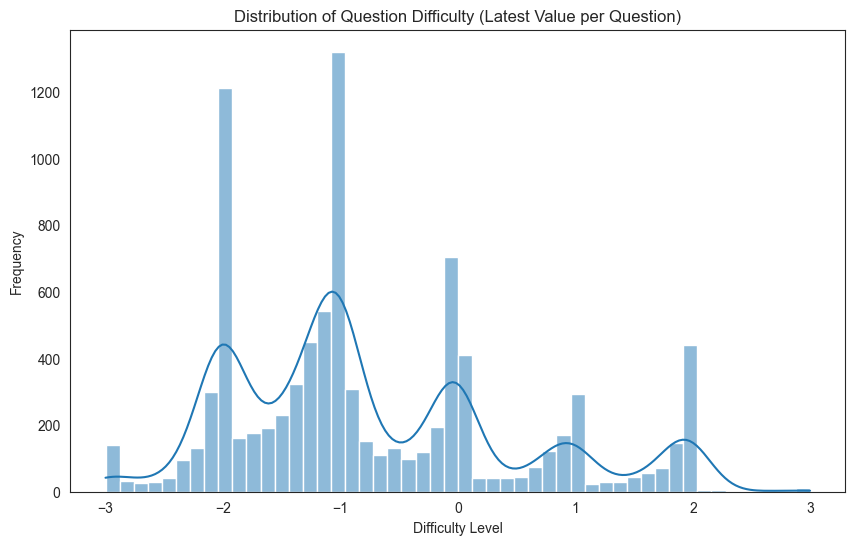

In [32]:
# Get the latest difficulty for each unique question
latest_difficulty = df.sort_values('created_at').groupby('question_id')['difficulty'].last().reset_index()

# Plot the distribution of difficulty
plt.figure(figsize=(10,6))
sns.histplot(x=latest_difficulty['difficulty'].dropna(), bins=50, kde=True)
plt.title('Distribution of Question Difficulty (Latest Value per Question)')
plt.xlabel('Difficulty Level')
plt.ylabel('Frequency')
plt.show()


Observations:
- The distribution of difficulty is bounded between -3 and 3, as this was enforced during data cleaning
- There are notable spikes at whole number values (-3, -2, -1, 0, 1, 2), suggesting a tendency to assign rounded difficulty values
- An interesting pattern emerges between whole numbers: after each whole number peak, there's a sharp drop followed by a gradual exponential increase until the next whole number. This creates a "sawtooth" pattern that repeats across the distribution


---

### 7.3 Bivariate Analysis
We will explore relationships between variables to identify patterns and correlations.

#### 7.3.1 Student Time Taken vs. Correctness

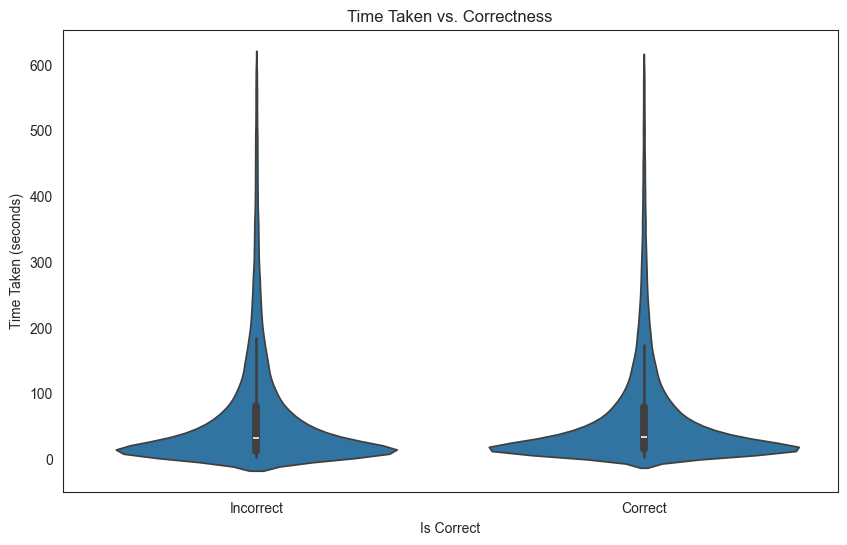

In [33]:
# Violin plot of time taken for correct and incorrect answers
plt.figure(figsize=(10,6))
sns.violinplot(x='is_correct', y='student_time_taken', data=df)
plt.title('Time Taken vs. Correctness')
plt.xlabel('Is Correct')
plt.ylabel('Time Taken (seconds)')
plt.xticks([0,1], ['Incorrect', 'Correct'])
plt.show()


Observations:
- The distributions of time taken for both correct and incorrect answers are very similar in shape
- Students who answered correctly took slightly longer on average than those who answered incorrectly


#### 7.3.2 Avg Question Time vs. Correctness

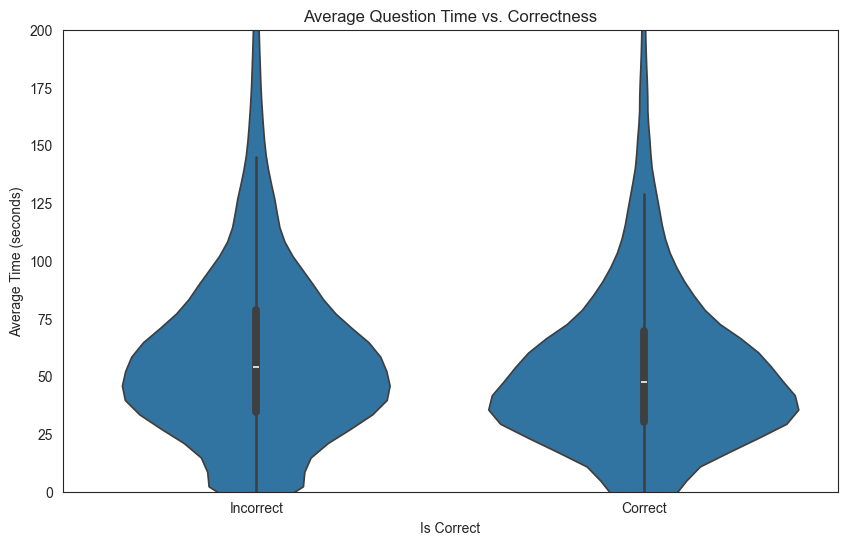

In [34]:
# Violin plot of average question time for correct and incorrect answers
plt.figure(figsize=(10,6))
sns.violinplot(x='is_correct', y='avg_question_time', data=df)
plt.title('Average Question Time vs. Correctness')
plt.xlabel('Is Correct')
plt.ylabel('Average Time (seconds)')
plt.xticks([0,1], ['Incorrect', 'Correct'])
plt.ylim(0, 200)  # Set y-axis limit to 200
plt.show()


Observations:
- The distributions of average time taken for both correct and incorrect answers are very similar in shape
- Questions that students mostly answered incorrectly have slightly longer average completion times


#### 7.3.3 Difficulty vs Correctness

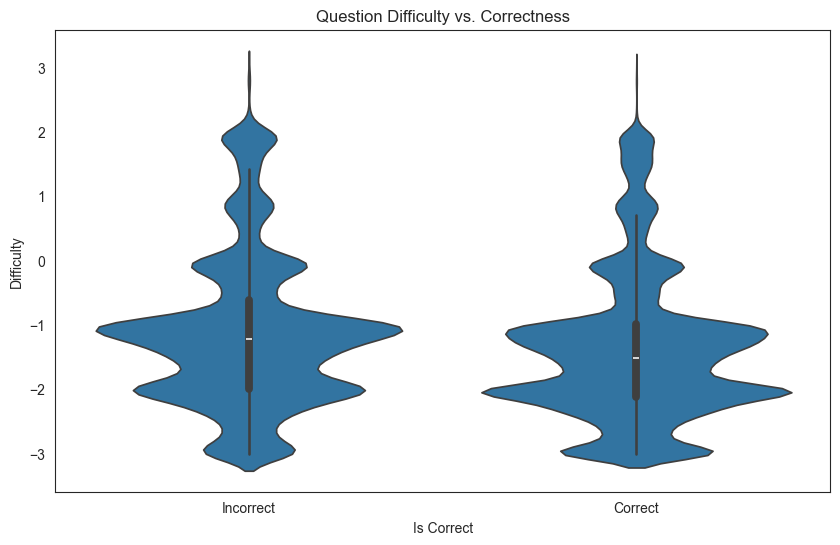

In [35]:
# Violin plot of difficulty for correct and incorrect answers
plt.figure(figsize=(10,6))
sns.violinplot(x='is_correct', y='difficulty', data=df)
plt.title('Question Difficulty vs. Correctness')
plt.xlabel('Is Correct')
plt.ylabel('Difficulty')
plt.xticks([0,1], ['Incorrect', 'Correct'])
plt.show()



#### 7.3.4 User Level vs. Correctness

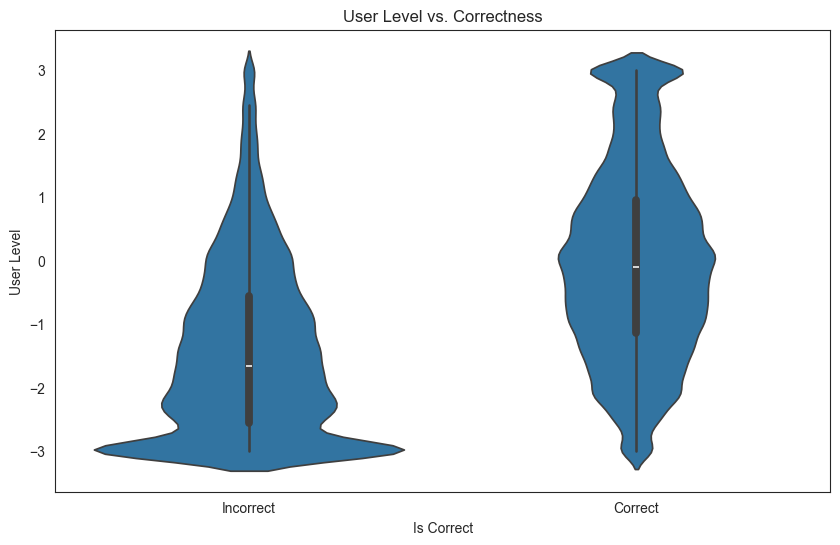

In [36]:
# Violin plot of user level vs. correctness
plt.figure(figsize=(10,6))
sns.violinplot(x='is_correct', y='user_level', data=df)
plt.title('User Level vs. Correctness')
plt.xlabel('Is Correct')
plt.ylabel('User Level')
plt.xticks([0,1], ['Incorrect', 'Correct'])
plt.show()

Observations:
- The correct answers have a higher concentration of students with higher level, which makes sense as students with more skill should have more correct answers


#### 7.3.5 Question Success Ratio vs. Difficulty

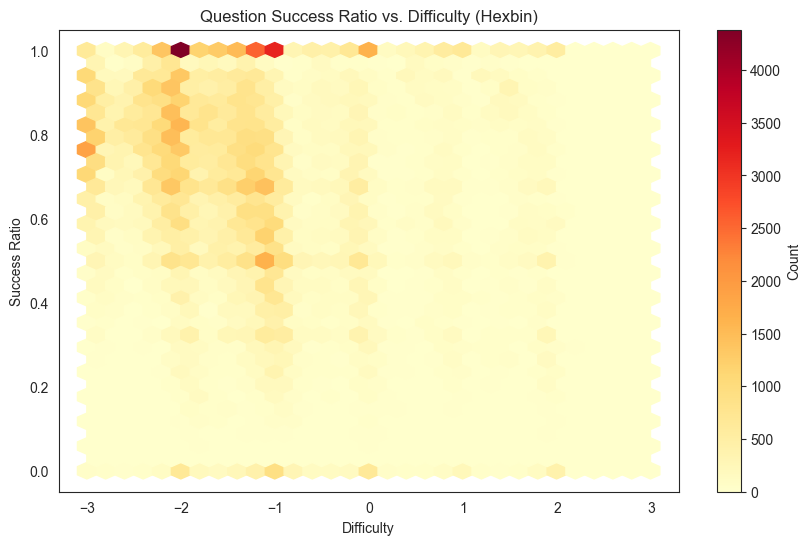

In [37]:
# Hexbin plot
plt.figure(figsize=(10, 6))
plt.hexbin(df['difficulty'], df['question_success_ratio'], 
           gridsize=30, cmap='YlOrRd')
plt.colorbar(label='Count')
plt.title('Question Success Ratio vs. Difficulty (Hexbin)')
plt.xlabel('Difficulty')
plt.ylabel('Success Ratio')
plt.show()

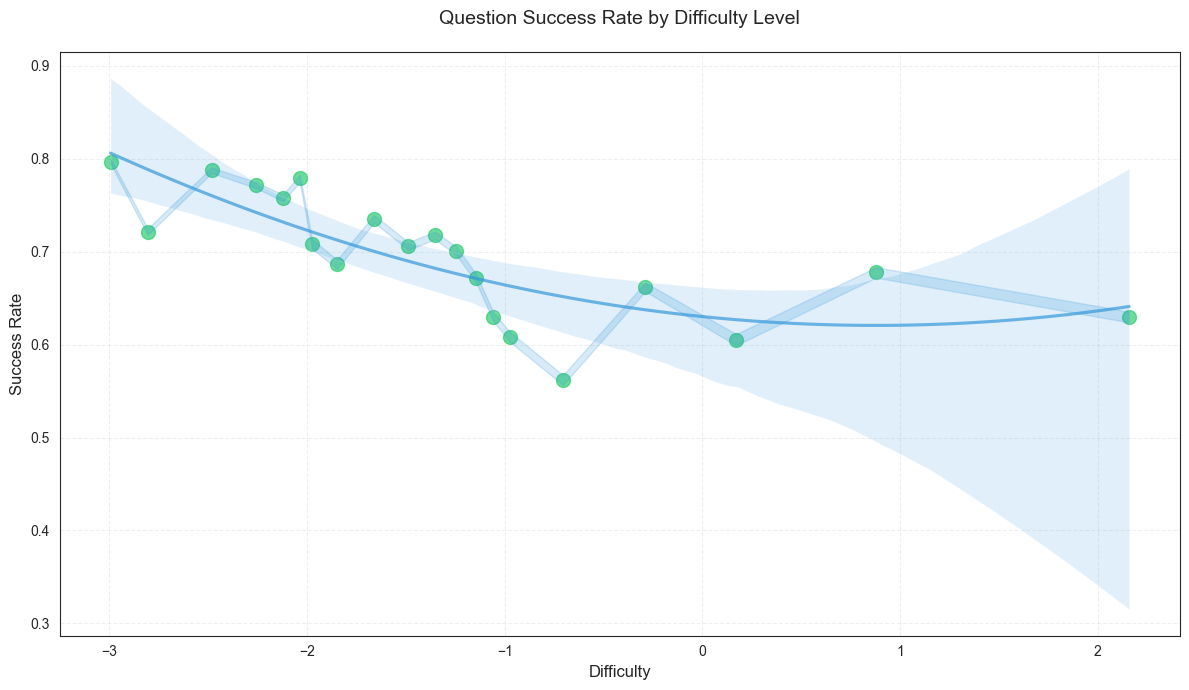

In [38]:
# Styled line plot with confidence interval using seaborn
plt.figure(figsize=(12, 7))
# Get bin centers manually
difficulty_groups = df.groupby(pd.qcut(df['difficulty'], 20))['question_success_ratio'].agg(['mean', 'std', 'count'])
bin_centers = [(x.left + x.right)/2 for x in difficulty_groups.index]

difficulty_df = pd.DataFrame({
    'difficulty': bin_centers,
    'mean': difficulty_groups['mean'],
    'std': difficulty_groups['std']
})

# Calculate confidence intervals
confidence_interval = 1.96 * difficulty_groups['std'] / np.sqrt(difficulty_groups['count'])
sns.regplot(x='difficulty', y='mean', data=difficulty_df,
            scatter_kws={'s': 100, 'alpha': 0.7, 'color': '#2ecc71'},
            line_kws={'color': '#3498db', 'alpha': 0.7},
            order=2)  # Fit quadratic regression line

plt.fill_between(difficulty_df['difficulty'],
                 difficulty_df['mean'] - confidence_interval,
                 difficulty_df['mean'] + confidence_interval,
                 alpha=0.2, color='#3498db')

plt.title('Question Success Rate by Difficulty Level', fontsize=14, pad=20)
plt.xlabel('Difficulty', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

Observations:
- The hexbin plot reveals a clear concentration of observations in the top-left quadrant, indicating that easier questions (lower difficulty) tend to have higher success rates. This suggests a natural relationship where students perform better on questions designed to be less challenging.
- The second plot shows a regression analysis with confidence intervals. We fitted a quadratic regression line to the mean success rates across different difficulty levels, with the shaded area representing the 95% confidence interval around the regression line.
- In this regression plot, we can observe a clear descending trajectory as difficulty increases. This confirms our initial observation from the hexbin plot - there is a negative correlation between question difficulty and success rate, where higher difficulty levels consistently correspond to lower success rates among students.

---

### 7.4 Multivariate Analysis
We will explore relationships between multiple variables to identify patterns and correlations.


#### 7.4.1 Heatmap of Correlation Matrix

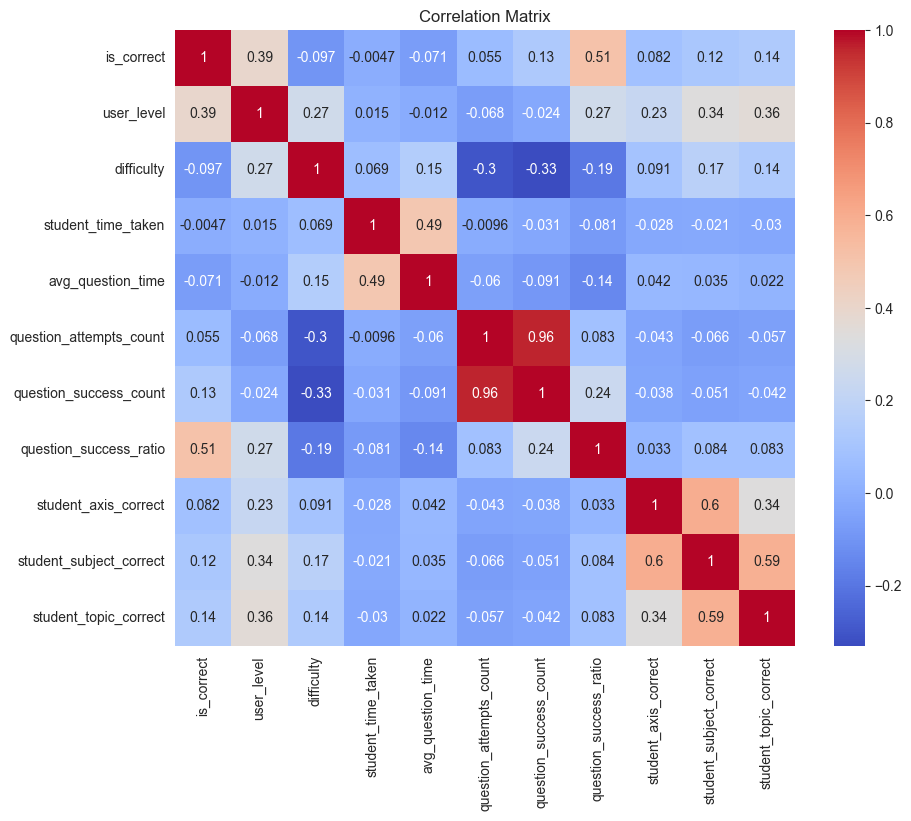

In [39]:
# Compute the correlation matrix
corr_matrix = df[['is_correct', 'user_level', 'difficulty', 'student_time_taken', 'avg_question_time', 'question_attempts_count', 'question_success_count', 'question_success_ratio', 'student_axis_correct', 'student_subject_correct', 'student_topic_correct']].corr()

# Plot the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


User Level Relationships:
- User level shows a positive correlation with correct answers (is_correct) and question success ratio, indicating that more experienced users tend to perform better overall
- There's a positive correlation between user level and difficulty, suggesting that higher-level users are given more challenging questions
- User level is positively correlated with correctness counts across axes, subjects and topics, demonstrating consistent performance across different areas

Difficulty Relationships:
- Question difficulty shows expected negative correlations with success counts and success ratio, confirming that harder questions result in lower success rates

Time Metrics:
- As expected, there's a strong positive correlation between average question time and student time taken, showing consistency in time spent across questions


#### 7.4.2 Scatter Plot Matrix with KDE
This section presents a scatter plot matrix with Kernel Density Estimation (KDE) plots to visualize relationships between key variables:
- User level: Shows student experience/proficiency
- Difficulty: Question difficulty rating
- Question success ratio: Rate of correct answers
- Average question time: Time typically spent on questions

The matrix will show:
- Scatter plots in upper triangle to show direct relationships
- KDE plots in lower triangle to show distribution patterns
- KDE plots on diagonal showing individual variable distributions

A sample of 5000 points is used for better visibility and performance.


<Figure size 1200x1200 with 0 Axes>

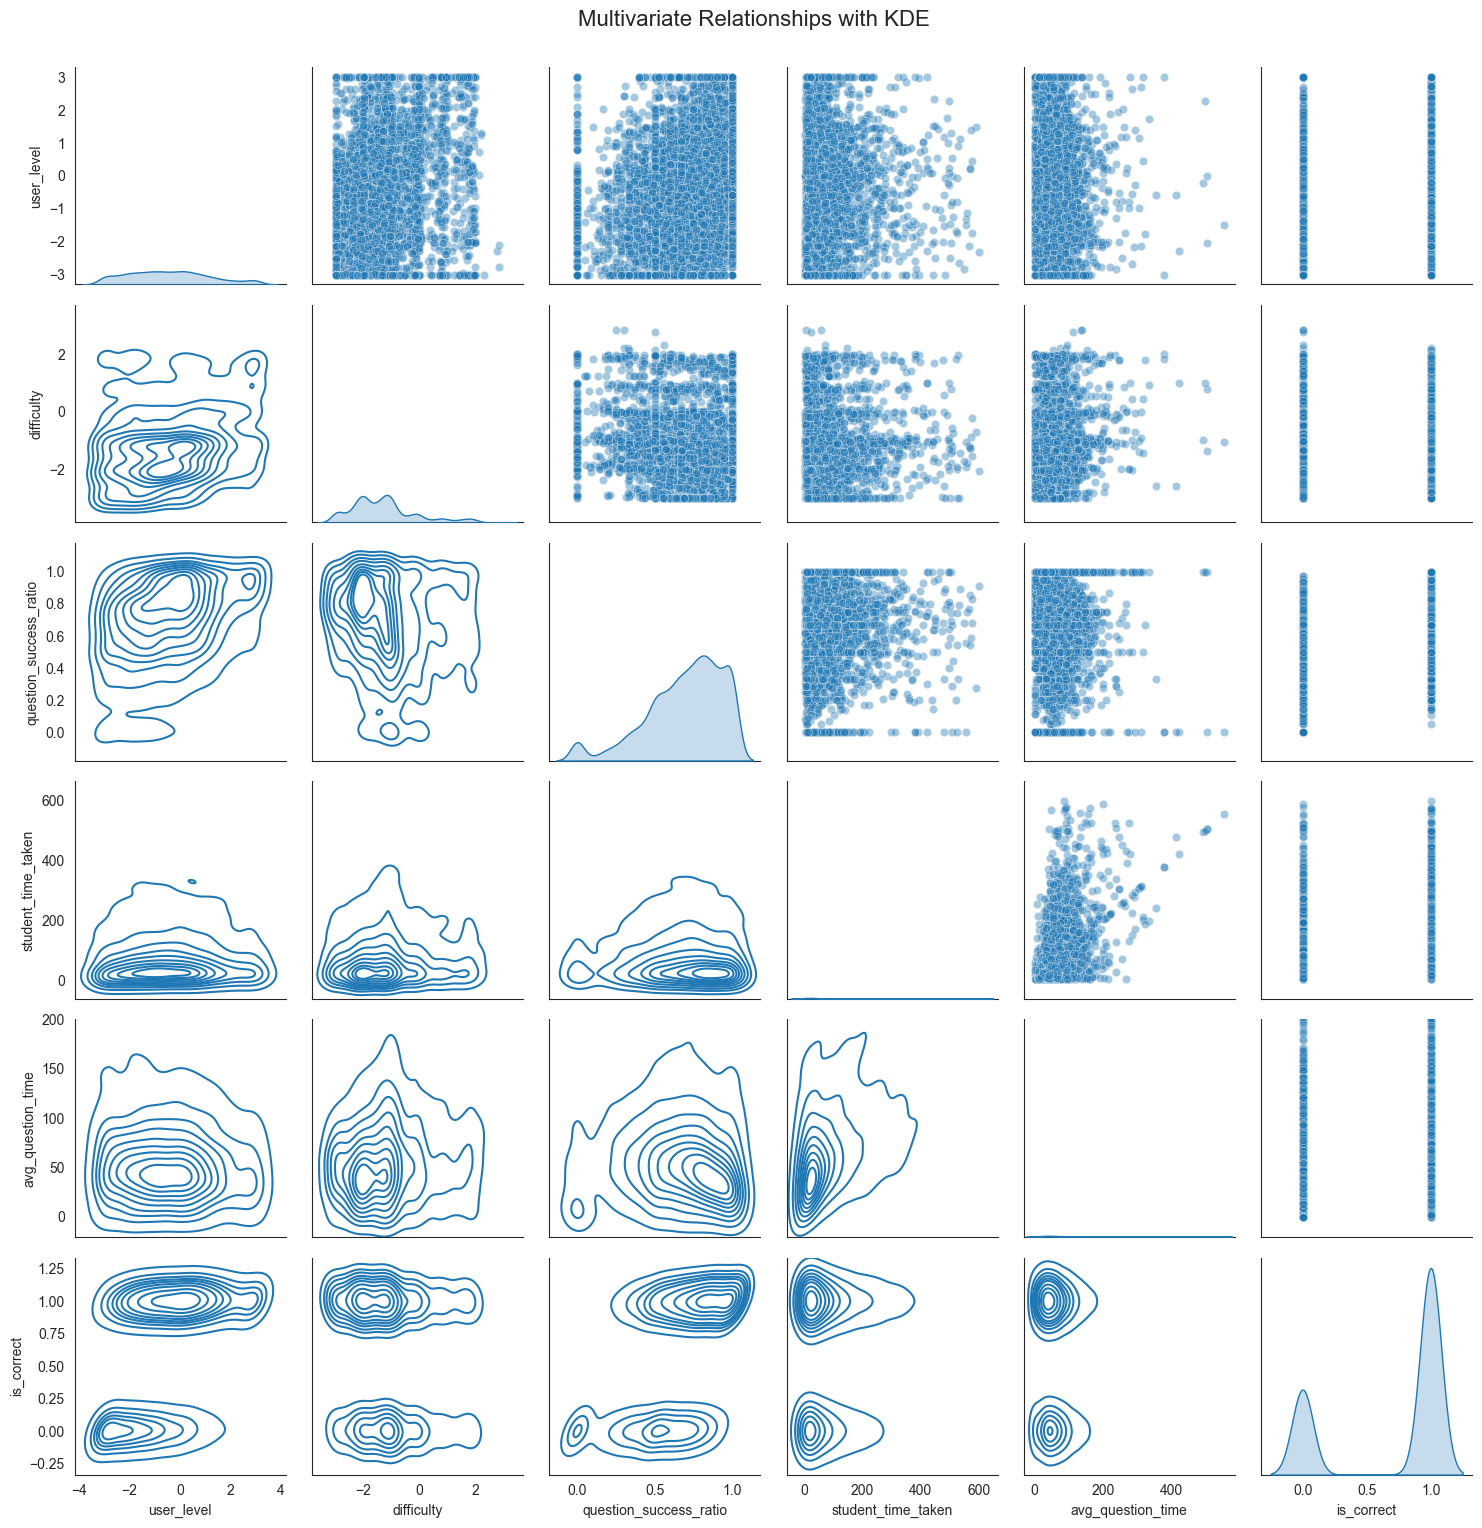

In [40]:
# Create a subset of variables for better visibility
selected_vars = ['user_level', 'difficulty', 'question_success_ratio', 'student_time_taken', 'avg_question_time', 'is_correct']

# Set up the scatter plot matrix with KDE and limit y-axis for 'avg_question_time'
plt.figure(figsize=(12, 12))
sns.set_style("white")
g = sns.PairGrid(df[selected_vars].sample(5000))

# Apply scatter plot for upper triangle and restrict y-axis for avg_question_time
g.map_upper(sns.scatterplot, alpha=0.4)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, fill=True)

# Limit the y-axis for 'avg_question_time' plots
for ax in g.axes.flatten():
    # Check if 'avg_question_time' is in y-axis and set limit
    if ax.get_ylabel() == 'avg_question_time':
        ax.set_ylim(-20, 200)

plt.suptitle('Multivariate Relationships with KDE', y=1.02, size=16)
plt.show()

Key Observations from the Scatter Plot Matrix:
- The visualizations confirm the relationships we identified in the correlation heatmap
- User Level vs Difficulty:
    - Lower-level users are typically presented with easier questions
    - Higher-level users receive more challenging questions
    - This demonstrates the adaptive nature of the learning platform
- User Level vs Question Success Ratio:
    - A positive relationship exists between user level and success rate
    - Higher-level users tend to achieve better success ratios
    - This suggests that experience on the platform correlates with improved performance
- Difficulty vs Question Success Ratio:
    - Clear negative correlation between question difficulty and success rate
    - Easier questions (lower difficulty) show higher success ratios
    - More difficult questions result in lower success rates, as expected


---

### 7.5 Axis, Subject and Topic Analysis
We will analyze the performance of students in different axes, subjects and topics to identify any patterns or differences.


#### 7.5.1 Axis Analysis

##### 7.5.1.1 Axis Success Ratio

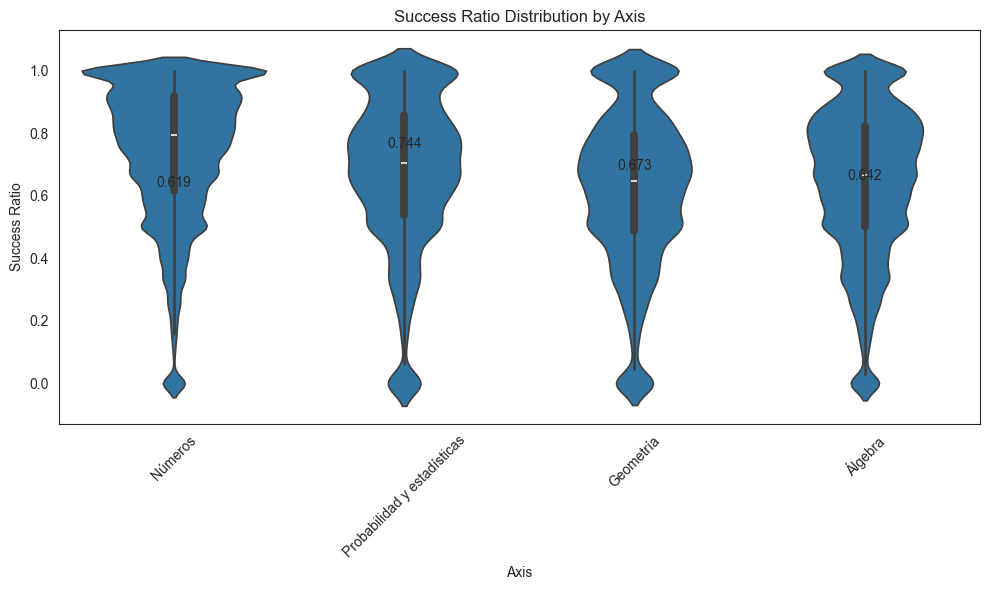

In [41]:
# Create violin plot of success ratio by axis
plt.figure(figsize=(10, 6))

# Create violin plot
sns.violinplot(data=df, x='axis_name', y='question_success_ratio')

# Customize plot
plt.title('Success Ratio Distribution by Axis')
plt.xlabel('Axis')
plt.ylabel('Success Ratio')
plt.xticks(rotation=45)

# Add mean values as text annotations
axis_means = df.groupby('axis_name')['question_success_ratio'].mean()
for i, mean in enumerate(axis_means):
    plt.text(i, mean, f'{mean:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### 7.5.1.2 Axis Correctness

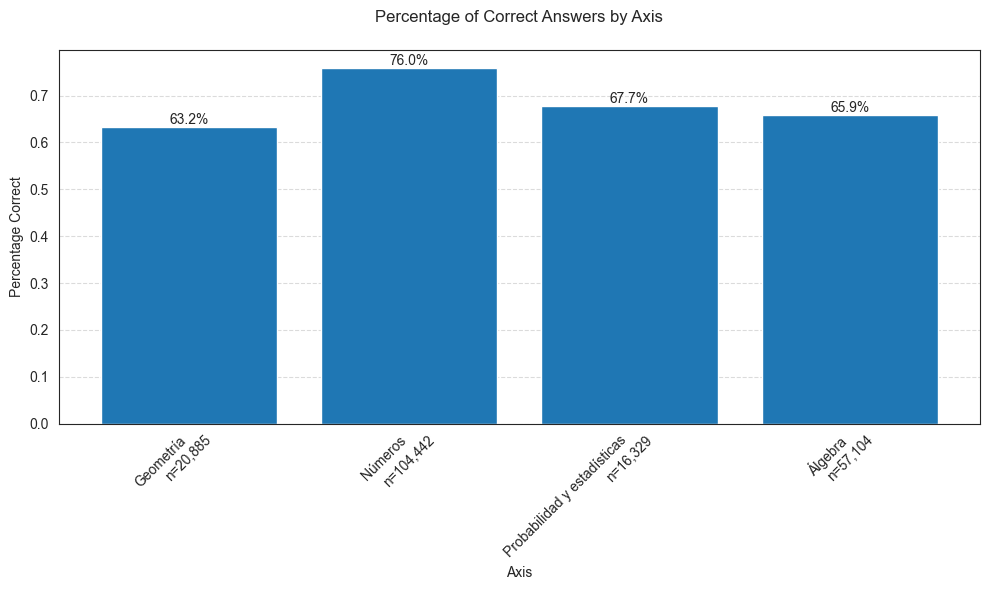

In [42]:
# Create a figure for the axis correctness visualization
plt.figure(figsize=(10, 6))

# Calculate percentage of correct answers by axis
axis_correctness = df.groupby('axis_name')['is_correct'].agg(['mean', 'count']).reset_index()
axis_correctness.columns = ['axis_name', 'correct_ratio', 'total_answers']

# Create bar plot with custom colors and alpha for transparency
bars = plt.bar(axis_correctness['axis_name'], axis_correctness['correct_ratio'])

# Customize plot
plt.title('Percentage of Correct Answers by Axis', pad=20, fontsize=12)
plt.xlabel('Axis', fontsize=10)
plt.ylabel('Percentage Correct', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}',
             ha='center', va='bottom')

# Add total answers as text below axis names
for i, (_, row) in enumerate(axis_correctness.iterrows()):
    plt.text(i, -0.02, f'n={int(row["total_answers"]):,}', 
             ha='center', va='top', rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 7.5.1.3 Axis Difficulty

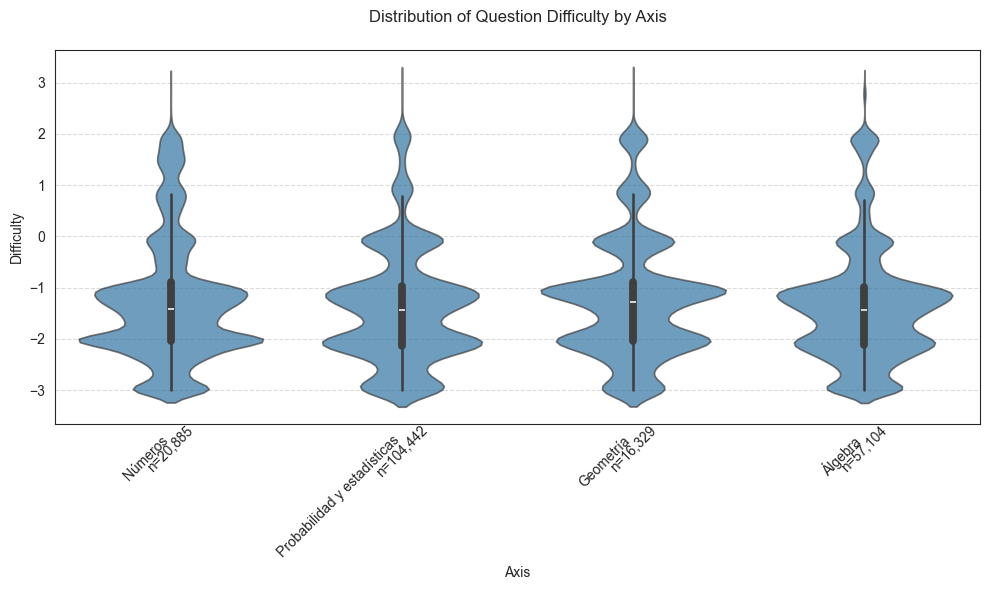

In [43]:
# Create a figure for the axis difficulty distribution visualization
plt.figure(figsize=(10, 6))

# Create violin plot to show difficulty distribution by axis
sns.violinplot(data=df, x='axis_name', y='difficulty', 
               inner='box', # Show box plot inside violin
               alpha=0.7)

# Customize plot
plt.title('Distribution of Question Difficulty by Axis', pad=20, fontsize=12)
plt.xlabel('Axis', fontsize=10)
plt.ylabel('Difficulty', fontsize=10)
plt.xticks(rotation=45, ha='right')

# Add sample size annotations below axis names
axis_counts = df.groupby('axis_name')['difficulty'].count()
for i, count in enumerate(axis_counts):
    plt.text(i, plt.ylim()[0], f'n={int(count):,}',
             ha='center', va='top', rotation=45)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


#### 7.5.2 Subject Analysis

##### 7.5.2.1 Subject Success Ratio

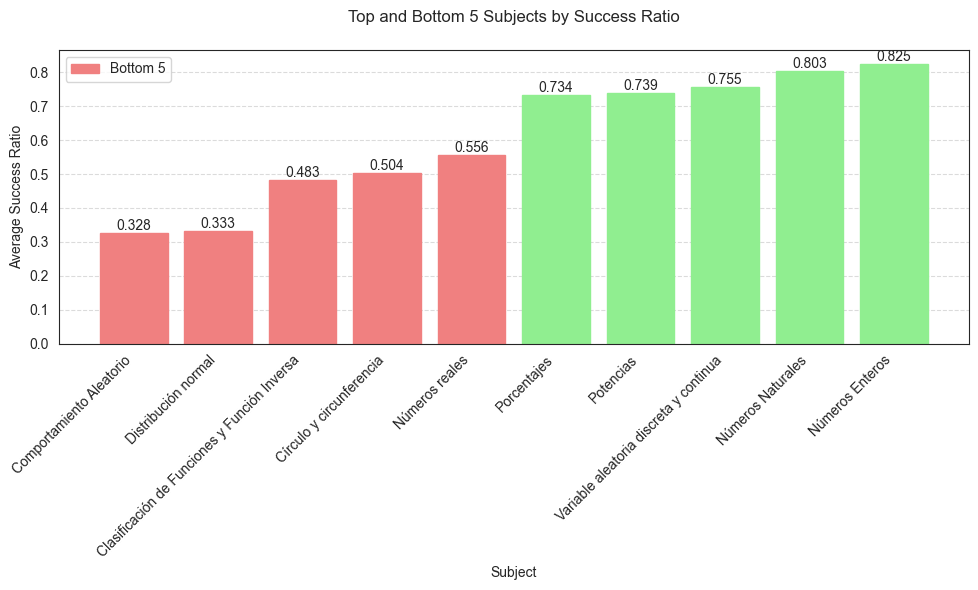

In [44]:
# Calculate mean success ratio by subject
subject_success = df.groupby('subject_name')['question_success_ratio'].mean().sort_values()

# Get top and bottom 5 subjects
bottom_5 = subject_success.head(5)
top_5 = subject_success.tail(5)

# Combine into single series for plotting
plot_data = pd.concat([bottom_5, top_5])

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(range(len(plot_data)), plot_data.values.astype(float))

# Color the bars (red for bottom 5, green for top 5)
for i in range(len(bars)):
    if i < 5:
        bars[i].set_color('lightcoral')
    else:
        bars[i].set_color('lightgreen')

# Customize plot
plt.title('Top and Bottom 5 Subjects by Success Ratio', pad=20, fontsize=12)
plt.xlabel('Subject', fontsize=10)
plt.ylabel('Average Success Ratio', fontsize=10)

# Set x-axis labels
plt.xticks(range(len(plot_data)), plot_data.index.tolist(), rotation=45, ha='right')

# Add value labels on top of bars
for i, v in enumerate(plot_data.values):
    plt.text(i, v, f'{v:.3f}', ha='center', va='bottom')

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(['Bottom 5', 'Top 5'])

# Adjust layout and display
plt.tight_layout()
plt.show()


##### 7.5.2.2 Subject Correctness

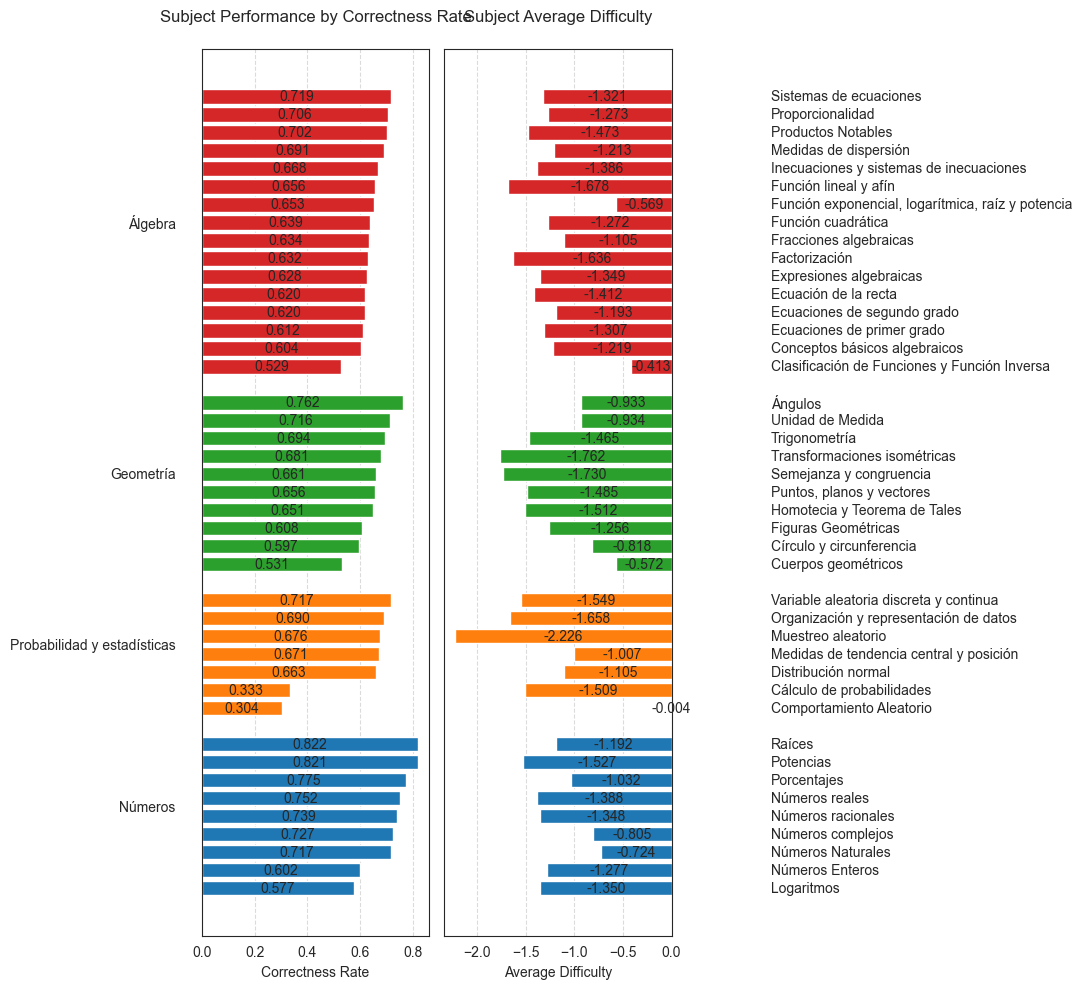

In [45]:
# Calculate average correctness and difficulty by axis and subject
axis_subject_correctness = df.groupby(['axis_name', 'subject_name'])['is_correct'].mean()
axis_subject_difficulty = df.groupby(['axis_name', 'subject_name'])['difficulty'].mean()

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 10))

# Get unique axes for plotting
axes = df['axis_name'].unique()
total_bars = len(axis_subject_correctness)
current_pos = 0

# Plot correctness
for axis in axes:
    # Get subjects for this axis
    axis_data = axis_subject_correctness[axis].sort_values()
    n_subjects = len(axis_data)
    
    # Plot bars for this axis
    bars = ax1.barh(range(current_pos, current_pos + n_subjects), axis_data.values)
    
    # Add value labels
    for i, v in enumerate(axis_data.values):
        ax1.text(v/2, current_pos + i, f'{v:.3f}', ha='center', va='center')
    
    # Add axis label
    ax1.text(-0.1, current_pos + n_subjects/2, axis, ha='right', va='center')
    
    current_pos += n_subjects + 1  # Add space between axes

ax1.set_title('Subject Performance by Correctness Rate', pad=20, fontsize=12)
ax1.set_xlabel('Correctness Rate', fontsize=10)
ax1.set_yticks(range(total_bars + len(axes) - 1))
ax1.set_yticklabels([])
ax1.grid(axis='x', linestyle='--', alpha=0.7)

# Reset position counter for difficulty plot
current_pos = 0

# Plot difficulty
for axis in axes:
    # Get subjects for this axis
    axis_data = axis_subject_difficulty[axis][axis_subject_correctness[axis].index]
    n_subjects = len(axis_data)
    
    # Plot bars for this axis
    bars = ax2.barh(range(current_pos, current_pos + n_subjects), axis_data.values)
    
    # Add value labels
    for i, v in enumerate(axis_data.values):
        ax2.text(v/2, current_pos + i, f'{v:.3f}', ha='center', va='center')
    
    # Add subject labels
    for i, subject in enumerate(axis_data.index):
        ax2.text(1.02, current_pos + i, subject, ha='left', va='center')
    
    current_pos += n_subjects + 1  # Add space between axes

ax2.set_title('Subject Average Difficulty', pad=20, fontsize=12)
ax2.set_xlabel('Average Difficulty', fontsize=10)
ax2.set_yticks(range(total_bars + len(axes) - 1))
ax2.set_yticklabels([])
ax2.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [46]:
# load holdout data
holdout_df = pd.read_csv('data/new/master_test.csv')

# info
holdout_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56196 entries, 0 to 56195
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answer_id       56196 non-null  int64  
 1   is_correct      56196 non-null  bool   
 2   created_at      56196 non-null  object 
 3   user_id         56196 non-null  int64  
 4   grade_id        47222 non-null  float64
 5   grade_name      47222 non-null  object 
 6   school_id       47222 non-null  float64
 7   school_name     47222 non-null  object 
 8   user_level      54527 non-null  float64
 9   question_id     56196 non-null  int64  
 10  options         56196 non-null  object 
 11  question_title  56196 non-null  object 
 12  correct_option  56196 non-null  object 
 13  solution        56196 non-null  object 
 14  hint            56185 non-null  object 
 15  difficulty      56196 non-null  float64
 16  topic_id        56196 non-null  int64  
 17  topic_name      56196 non-null 

---

## 8. Regression Predictions

### 8.1 Error Metric
We chose Root Mean Squared Error (RMSE) as our regression error metric. RMSE uses the same units as the target variable and penalizes large errors more heavily, making it an intuitive and balanced choice.

### 8.2 Data Preparation
First, we clean and prepare the data for modeling. We remove any rows with missing values in the target variable `user_level`, and select the relevant features for our models.


In [47]:
# Remove rows with missing 'student_time_taken'
df = df.dropna(subset=['user_level'])

# Optionally reset the index
df.reset_index(drop=True, inplace=True)

# Check the shape of the data
print(f'Dataset shape after dropping missing target values: {df.shape}')


Dataset shape after dropping missing target values: (198760, 37)


And now we prepare the relevant features for our models.

In [48]:
# List of features
baseline_features = ['is_correct']
features = ['difficulty', 
            'is_correct', 
            'student_time_taken', 
            'question_success_ratio', 
            'avg_question_time',
            'student_total_attempts', 
            'student_total_correct', 
            'student_topic_attempts', 
            'student_topic_correct', 
            'student_subject_attempts', 
            'student_subject_correct', 
            'student_axis_attempts', 
            'student_axis_correct']

# Check for missing values in features
missing_values = df[features].isnull().sum()
print("Missing values in features:\n", missing_values)


Missing values in features:
 difficulty                      0
is_correct                      0
student_time_taken          20887
question_success_ratio          0
avg_question_time               0
student_total_attempts          0
student_total_correct           0
student_topic_attempts          0
student_topic_correct           0
student_subject_attempts        0
student_subject_correct         0
student_axis_attempts           0
student_axis_correct            0
dtype: int64


In [49]:
# Remove rows with missing values in features
df = df.dropna(subset=features)

# Optionally reset the index
df.reset_index(drop=True, inplace=True)

---

### 8.3 Baseline Models
For our baseline models we will use:
1. Mean prediction - simply predicting the mean of the outcome variable
2. Simple OLS regression with is_correct as the only predictor
These will give us baseline RMSE values to compare more complex models against

#### 8.3.1 Mean Prediction

In [50]:
# Calculate the mean of the target variable
mean_user_level = df['user_level'].mean()

# Predict the mean for all observations
mean_predictions = np.full(shape=df.shape[0], fill_value=mean_user_level)

# Calculate RMSE
rmse_baseline_mean = np.sqrt(mean_squared_error(df['user_level'], mean_predictions))

print(f'Baseline Mean Prediction RMSE: {rmse_baseline_mean:.4f}')


Baseline Mean Prediction RMSE: 1.5916


#### 8.3.2 Simple OLS Regression
We use question is_correct as the only predictor in a simple linear regression model.

In [51]:
# Define predictor and target variable
X_baseline = df[['is_correct']]
y = df['user_level']

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the linear regression model
lr_baseline = LinearRegression()

# Define RMSE scorer (note that greater_is_better=False since lower RMSE is better)
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(lr_baseline, X_baseline, y, cv=kf, scoring=rmse_scorer)

print(f'Baseline Linear Regression RMSE (mean over folds): {cv_scores.mean():.4f}')

Baseline Linear Regression RMSE (mean over folds): 1.4615


### 8.4 Training and Evaluation

We plan to use 5-fold cross-validation, which balances computational efficiency with reliable error estimation. This means dividing our training data into 5 equal parts, training each model on 4 parts and testing it on the remaining part, then repeating this process 5 times so each part serves as the test set once. We'll calculate the RMSE for each test set and average these errors to get a reliable estimate of model performance.

### 8.5 Modeling Strategies
We will use three different modeling strategies and compare their performance to the baseline models.

#### 8.5.1 Lasso Regression
Lasso regression model incorporates multiple relevant predictors with L1 regularization, including:

- `is_correct`
- `difficulty`
- `question_success_ratio`
- `avg_question_time`
- `student_total_attempts`
- `student_total_correct`
- `student_topic_attempts`
- `student_topic_correct`
- `student_subject_attempts`
- `student_subject_correct`
- `student_axis_attempts`
- `student_axis_correct`

In [52]:
# Prepare features and target variable
X = df[features].copy()
y = df['user_level'].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Lasso model
lasso = Lasso(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]
}

# Set up GridSearchCV with RMSE scoring
lasso_reg_grid_search = GridSearchCV(
    lasso,
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1
)

# Fit the model
lasso_reg_grid_search.fit(X_scaled, y)

# Get best parameters and model
lasso_reg_best_params = lasso_reg_grid_search.best_params_
lasso_reg_best_model = lasso_reg_grid_search.best_estimator_
lasso_reg_rmse = -lasso_reg_grid_search.best_score_

# Get feature names and coefficients
feature_coef = pd.DataFrame({
    'Feature': features,
    'Coefficient': lasso_reg_best_model.coef_
})

# Find dropped features (coefficients very close to 0)
dropped_features = feature_coef[abs(feature_coef['Coefficient']) < 1e-10]['Feature'].tolist()

print(f'Lasso Regression RMSE: {lasso_reg_rmse:.4f}')
print(f'\nBest alpha parameter: {lasso_reg_best_params["alpha"]}')
print(f'\nBest model:\n{lasso_reg_best_model}')
print(f'\nFeatures dropped by Lasso (coefficients ≈ 0):')
for feature in dropped_features:
    print(f'- {feature}')


/Users/matiashoyl/miniconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.920e+01, tolerance: 3.699e+01
  model = cd_fast.enet_coordinate_descent(


Lasso Regression RMSE: 1.2180

Best alpha parameter: 0.01

Best model:
Lasso(alpha=0.01, random_state=42)

Features dropped by Lasso (coefficients ≈ 0):
- student_total_correct


#### 8.5.2 K-Nearest Neighbors Regression
K-Nearest Neighbors (KNN) regression is a non-parametric method that makes predictions by averaging the values of K nearest neighbors in the feature space. It's particularly useful when the relationship between features and target variable is non-linear but locally approximable. For our student time prediction task, KNN could capture patterns where similar questions (in terms of difficulty, success ratio etc.) tend to take similar amounts of time to complete.




In [53]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define parameter grid
param_grid = {'n_neighbors': [30, 32, 34, 36, 38, 40]}

# Initialize KNN Regressor
knn = KNeighborsRegressor()

# Use GridSearchCV for hyperparameter tuning
knn_reg_grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1   # Show progress
)

# Fit the model
knn_reg_grid_search.fit(X_scaled, y)

# Get best parameters and score
knn_reg_best_params = knn_reg_grid_search.best_params_
knn_reg_rmse = -knn_reg_grid_search.best_score_  # Negative because of scoring metric

print(f'Best parameters: {knn_reg_best_params}')
print(f'Best K-Nearest Neighbors Regression RMSE: {knn_reg_rmse:.4f}')


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'n_neighbors': 38}
Best K-Nearest Neighbors Regression RMSE: 1.1863


#### 8.5.3 XGBoost Regression
As our most sophisticated approach, we employ XGBoost with the same feature set. This choice is motivated by XGBoost's ability to automatically capture non-linear relationships between predictors, handle interactions between features (e.g., how difficulty affects completion time differently at various user levels), manage outliers through its tree-based structure, and learn complex patterns in educational data where student performance metrics often have hierarchical dependencies.

In [54]:
# Initialize XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400],           
    'learning_rate': [0.01, 0.05, 0.1, 0.15],       
    'max_depth': [3, 4, 5, 6],                      
    'min_child_weight': [1, 3, 5, 7],               
    'subsample': [0.7, 0.8, 0.9, 1.0],             
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]       
}

# Set up GridSearchCV with RMSE scoring
xgb_reg_grid_search = RandomizedSearchCV(
    estimator=xgb_reg,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings to try
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=1,   # Show progress
    random_state=42  # For reproducibility
)

# Fit the model
xgb_reg_grid_search.fit(X, y)

# Get best parameters and score
xgb_reg_best_params = xgb_reg_grid_search.best_params_
xgb_reg_rmse = -xgb_reg_grid_search.best_score_  # Negative because of scoring metric

print(f'Best parameters: {xgb_reg_best_params}')
print(f'Best XGBoost Regression RMSE: {xgb_reg_rmse:.4f}')

# Show top 5 parameter combinations
results_df = pd.DataFrame(xgb_reg_grid_search.cv_results_)
top_5_params = results_df.nsmallest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]
print("\nTop 5 parameter combinations:")
for idx, row in top_5_params.iterrows():
    print(f"Parameters: {row['params']}")
    print(f"RMSE: {-row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})\n")

# Store best model
xgb_reg_best_model = xgb_reg_grid_search.best_estimator_


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'subsample': 0.9, 'n_estimators': 300, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Best XGBoost Regression RMSE: 1.0849

Top 5 parameter combinations:
Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
RMSE: 1.2619 (+/- 0.0801)

Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
RMSE: 1.2456 (+/- 0.0783)

Parameters: {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
RMSE: 1.2010 (+/- 0.0817)

Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
RMSE: 1.1742 (+/- 0.0773)

Parameters: {'subsample': 0.9, 'n_estimators': 200, 'min_child

Looking at the individual fold scores for the best parameter combination

In [55]:
# Regression Model Performance (XGBoost)
fold_scores = {
    f'Fold {i+1}': xgb_reg_grid_search.cv_results_[f'split{i}_test_score'][xgb_reg_grid_search.best_index_]
    for i in range(5)
}

print("XGBoost Regression Results")
print("-------------------------")
print("Individual fold RMSE scores:")
for fold, score in fold_scores.items():
    print(f"{fold}: {-score:.4f}")  # Negative because of scoring metric

mean_rmse = -np.mean(list(fold_scores.values()))
std_rmse = np.std(list(fold_scores.values()))
ci_lower = mean_rmse - 1.96 * std_rmse
ci_upper = mean_rmse + 1.96 * std_rmse

print(f"\nSummary Statistics:")
print(f"Mean RMSE: {mean_rmse:.4f}")
print(f"Standard Deviation: {std_rmse:.4f}")
print(f"95% CI: [{ci_lower:.4f}, {ci_upper:.4f}]")

XGBoost Regression Results
-------------------------
Individual fold RMSE scores:
Fold 1: 1.1774
Fold 2: 1.0268
Fold 3: 1.0837
Fold 4: 1.0228
Fold 5: 1.1137

Summary Statistics:
Mean RMSE: 1.0849
Standard Deviation: 0.0577
95% CI: [0.9719, 1.1979]


### 8.6 Model Comparison
We compare the RMSE of all models to determine the best-performing model.

In [56]:
print(f'Baseline Mean Prediction RMSE: {rmse_baseline_mean:.4f}')
print(f'Baseline Linear Regression RMSE: {cv_scores.mean():.4f}')
print(f'Lasso Regression RMSE: {lasso_reg_rmse:.4f}')
print(f'K-Nearest Neighbors Regression RMSE: {knn_reg_rmse:.4f}')
print(f'XGBoost Regression RMSE: {xgb_reg_rmse:.4f}')


Baseline Mean Prediction RMSE: 1.5916
Baseline Linear Regression RMSE: 1.4615
Lasso Regression RMSE: 1.2180
K-Nearest Neighbors Regression RMSE: 1.1863
XGBoost Regression RMSE: 1.0849


---

## 9. Classification Predictions

### 9.1 Error Metric
We choose Area Under the Receiver Operating Characteristic Curve (ROC AUC) as our primary error metric for classification. ROC AUC provides a summary of the model's ability to distinguish between the classes across all classification thresholds, making it suitable for datasets with class imbalance and for capturing the overall performance of the classifier.


### 9.2 Data Preparation
We prepare the data for modeling by removing any rows with missing values in the target variable `is_correct`, and selecting the relevant features for our models.

In [57]:
# Ensure 'is_correct' is numerical
df['is_correct'] = df['is_correct'].astype(int)

# List of features
baseline_features = ['difficulty']
features = ['difficulty', 
            'user_level', 
            'student_time_taken', 
            'question_success_ratio', 
            'avg_question_time',
            'student_total_attempts', 
            'student_total_correct', 
            'student_topic_attempts', 
            'student_topic_correct', 
            'student_subject_attempts', 
            'student_subject_correct', 
            'student_axis_attempts', 
            'student_axis_correct']

# Check for missing values in features
missing_values = df[features].isnull().sum()
print("Missing values in features:\n", missing_values)

Missing values in features:
 difficulty                  0
user_level                  0
student_time_taken          0
question_success_ratio      0
avg_question_time           0
student_total_attempts      0
student_total_correct       0
student_topic_attempts      0
student_topic_correct       0
student_subject_attempts    0
student_subject_correct     0
student_axis_attempts       0
student_axis_correct        0
dtype: int64


In [58]:
# Drop rows with missing values in features
df = df.dropna(subset=features)

# Optionally reset the index
df.reset_index(drop=True, inplace=True)

# Check class balance
class_counts = df['is_correct'].value_counts()
print("Class distribution:\n", class_counts)

Class distribution:
 is_correct
1    126711
0     51162
Name: count, dtype: int64


In [59]:
# Calculate class proportions
class_proportions = class_counts / class_counts.sum()
print("Class proportions:\n", class_proportions)

Class proportions:
 is_correct
1    0.712368
0    0.287632
Name: count, dtype: float64


### 9.3 Baselines
We established two baseline models to benchmark our more complex approaches:

1. **Majority Class Prediction**: Always predicts the most frequent class (`is_correct = 1` or `0`). This provides a minimum performance threshold.
2. **Logistic Regression with Difficulty Only**: Uses question difficulty as the only predictor of whether a student answers correctly. This helps us evaluate if additional features improve our predictions beyond this simple relationship.


#### 9.3.1 Majority Class Prediction
We predict the most frequent class in the training data and calculate the ROC AUC.


In [60]:
# Determine the majority class
majority_class = df['is_correct'].mode()[0]
print(f"Majority class: {majority_class}")

# Predict the majority class for all observations
majority_predictions = np.full(shape=df.shape[0], fill_value=majority_class)

# Since ROC AUC requires probabilities, we assign probabilities accordingly
if majority_class == 1:
    majority_probabilities = np.ones(df.shape[0])
else:
    majority_probabilities = np.zeros(df.shape[0])

# Calculate ROC AUC
auc_baseline_majority = roc_auc_score(df['is_correct'], majority_probabilities)

print(f'Baseline Majority Class ROC AUC: {auc_baseline_majority:.4f}')

Majority class: 1
Baseline Majority Class ROC AUC: 0.5000


#### 9.3.2 Logistic Regression with Difficulty Only
We use question difficulty as the only predictor in a logistic regression model.

In [61]:
# Define predictor and target variable
X_baseline = df[['difficulty']]
y = df['is_correct']

# Set up 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize the logistic regression model
lr_baseline = LogisticRegression()

# Perform cross-validation and get predicted probabilities
y_pred_proba_baseline = cross_val_predict(lr_baseline, X_baseline, y, cv=kf, method='predict_proba')[:, 1]

# Calculate ROC AUC
auc_baseline_lr = roc_auc_score(y, y_pred_proba_baseline)

print(f'Baseline Logistic Regression ROC AUC: {auc_baseline_lr:.4f}')


Baseline Logistic Regression ROC AUC: 0.5740


### 9.4 Training and Evaluation
We plan to use 5-fold cross-validation, which balances computational efficiency with reliable error estimation. We'll use the same folds across all models to ensure a fair comparison. The primary evaluation metric will be ROC AUC.

### 9.5 Modeling Strategies
We propose three distinct modeling strategies to predict whether a student's answer is correct:


#### 9.5.1 Logistic Regression with Multiple Features
We will use logistic regression with multiple relevant predictors, including:

- `difficulty`
- `user_level`
- `question_success_ratio`
- `avg_question_time`
  
We will also standardize the features to improve model performance.

In [62]:
# Prepare features and target variable
X = df[features]
y = df['is_correct']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the logistic regression model
lr = LogisticRegression()

# Perform cross-validation and get predicted probabilities
y_pred_proba_lr = cross_val_predict(lr, X_scaled, y, cv=kf, method='predict_proba')[:, 1]

# Calculate ROC AUC
lr_auc = roc_auc_score(y, y_pred_proba_lr)

print(f'Logistic Regression ROC AUC: {lr_auc:.4f}')

Logistic Regression ROC AUC: 0.8909


#### 9.5.2 Random Forest Classifier
To capture non-linear relationships and interactions between features, we'll use a Random Forest Classifier.


In [63]:
# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Set up GridSearchCV with ROC AUC scoring
rf_clf_grid_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=20,  # Number of parameter settings sampled
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the model
rf_clf_grid_search.fit(X, y)

# Get best parameters and score
rf_clf_best_params = rf_clf_grid_search.best_params_
rf_clf_auc = rf_clf_grid_search.best_score_

print(f'Best parameters: {rf_clf_best_params}')
print(f'Best Random Forest ROC AUC: {rf_clf_auc:.4f}')

# Show top 5 parameter combinations
results_df = pd.DataFrame(rf_clf_grid_search.cv_results_)
top_5_params = results_df.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]
print("\nTop 5 parameter combinations:")
for idx, row in top_5_params.iterrows():
    print(f"Parameters: {row['params']}")
    print(f"ROC AUC: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})\n")

# Store best model
rf_clf_best_model = rf_clf_grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
Best Random Forest ROC AUC: 0.9340

Top 5 parameter combinations:
Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
ROC AUC: 0.9340 (+/- 0.0133)

Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20}
ROC AUC: 0.9334 (+/- 0.0134)

Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}
ROC AUC: 0.9334 (+/- 0.0133)

Parameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 20}
ROC AUC: 0.9333 (+/- 0.0134)

Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20}
ROC AUC: 0.9333 (+/- 0.0133)



#### 9.5.3 XGBoost Classifier
As our most sophisticated approach, we'll employ XGBoost Classifier. XGBoost is known for its performance and ability to handle complex patterns in the data.

In [64]:
# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Define simplified parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up RandomizedSearchCV with ROC AUC scoring
xgb_clf_grid_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_grid,
    n_iter=20,  
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the model
xgb_clf_grid_search.fit(X, y)

# Get best parameters and score
xgb_clf_best_params = xgb_clf_grid_search.best_params_
xgb_clf_auc = xgb_clf_grid_search.best_score_

print(f'Best parameters: {xgb_clf_best_params}')
print(f'Best XGBoost ROC AUC: {xgb_clf_auc:.4f}')

# Show top 5 parameter combinations
results_df = pd.DataFrame(xgb_clf_grid_search.cv_results_)
top_5_params = results_df.nlargest(5, 'mean_test_score')[
    ['params', 'mean_test_score', 'std_test_score']
]
print("\nTop 5 parameter combinations:")
for idx, row in top_5_params.iterrows():
    print(f"Parameters: {row['params']}")
    print(f"ROC AUC: {row['mean_test_score']:.4f} (+/- {row['std_test_score']:.4f})\n")

# Store best model
xgb_clf_best_model = xgb_clf_grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/matiashoyl/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matiashoyl/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matiashoyl/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matiashoyl/miniconda3/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:59:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(sms

Best parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}
Best XGBoost ROC AUC: 0.9458

Top 5 parameter combinations:
Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.9}
ROC AUC: 0.9458 (+/- 0.0077)

Parameters: {'subsample': 0.9, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.9}
ROC AUC: 0.9457 (+/- 0.0080)

Parameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.9}
ROC AUC: 0.9456 (+/- 0.0085)

Parameters: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 3, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 1.0}
ROC AUC: 0.9456 (+/- 0.0078)

Parameters: {'subsample': 0.8, 'n_estimators': 300, 'min_

Now let's compare the ROC AUC of the five folds for the best model.

In [65]:
# Get individual fold scores for the best parameter combination
xgb_fold_scores = [
    xgb_clf_grid_search.cv_results_[f'split{i}_test_score'][xgb_clf_grid_search.best_index_]
    for i in range(5)
]
xgb_fold_scores = np.array(xgb_fold_scores)

# Print individual fold scores and statistics
print("Individual fold ROC AUC scores:")
for i, score in enumerate(xgb_fold_scores, 1):
    print(f"Fold {i}: {score:.4f}")

print(f"\nMean ROC AUC: {xgb_fold_scores.mean():.4f}")
print(f"Standard deviation: {xgb_fold_scores.std():.4f}")
print(f"95% Confidence Interval: [{xgb_fold_scores.mean() - 1.96*xgb_fold_scores.std():.4f}, {xgb_fold_scores.mean() + 1.96*xgb_fold_scores.std():.4f}]")

Individual fold ROC AUC scores:
Fold 1: 0.9531
Fold 2: 0.9521
Fold 3: 0.9357
Fold 4: 0.9372
Fold 5: 0.9510

Mean ROC AUC: 0.9458
Standard deviation: 0.0077
95% Confidence Interval: [0.9307, 0.9609]


### 9.6 Model Comparison
We compare the ROC AUC of all models to determine the best-performing model.

In [66]:
print(f'Baseline Majority Class ROC AUC: {auc_baseline_majority:.4f}')
print(f'Baseline Logistic Regression ROC AUC: {auc_baseline_lr:.4f}')
print(f'Logistic Regression ROC AUC: {lr_auc:.4f}')
print(f'Random Forest ROC AUC: {rf_clf_auc:.4f}')
print(f'XGBoost Classifier ROC AUC: {xgb_clf_auc:.4f}')

Baseline Majority Class ROC AUC: 0.5000
Baseline Logistic Regression ROC AUC: 0.5740
Logistic Regression ROC AUC: 0.8909
Random Forest ROC AUC: 0.9340
XGBoost Classifier ROC AUC: 0.9458
